<a href="https://colab.research.google.com/github/ilkersenturk/DataScience/blob/main/K-Nearest%20Neighboripynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import math 
# calculate manhattan distance
def manhattan(X1,X2):
  return sum(abs(e1-e2) for e1,e2 in zip(X1,X2))

############################################################
# calculate euclidian distance
def euclidian(X1,X2):
  return math.sqrt(sum((e1-e2)**2 for e1, e2 in zip(X1,X2)))


############################################################
# calculate minkowski distance
def minkowski_distance(a, b, p):
	return sum(abs(e1-e2)**p for e1, e2 in zip(a,b))**(1/p)
 
############################################################
def square_rooted(x):
    return round(math.sqrt(sum([a*a for a in x])),3)
def cosine_similarity(x,y):
  numerator = sum(a*b for a,b in zip(x,y))
  denominator = square_rooted(x)*square_rooted(y)
  return round(numerator/float(denominator),3)

############################################################
 # calculate hammjaccard similarity
def jaccard_similarity(x,y):
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

############################################################
def levenshtein(s, t):
  ''' From Wikipedia article; Iterative with two matrix rows. '''
  if s == t: return 0
  elif len(s) == 0: return len(t)
  elif len(t) == 0: return len(s)
  v0 = [None] * (len(t) + 1)
  v1 = [None] * (len(t) + 1)
  for i in range(len(v0)):
      v0[i] = i
  for i in range(len(s)):
      v1[0] = i + 1
      for j in range(len(t)):
          cost = 0 if s[i] == t[j] else 1
          v1[j + 1] = min(v1[j] + 1, v0[j + 1] + 1, v0[j] + cost)
      for j in range(len(v0)):
          v0[j] = v1[j]
          
  return v1[len(t)]


############################################################
# calculate hammingDistance distance
def hammingDistance(X1,X2):
  pass

In [4]:
import numpy as np
from collections import Counter



class KNN:
  '''
  check the distance betwen x and every X i 
  sort for k instances
  vote the classes 
  return the majority 
  
  '''
  def __init__(self, k=3 , distanceMethod = euclidian):
      self.k = k
      self.distanceMethod = distanceMethod

  def fit(self, X, y):
      self.X_train = X
      self.y_train = y

  def predict(self, X):
      y_pred = [self._predict(x) for x in X]
      return np.array(y_pred)

  def _predict(self, x):
      # Compute distances between x and all examples in the training set
      distances = [self.distanceMethod(x, x_train) for x_train in self.X_train]
      # Sort by distance and return indices of the first k neighbors
      k_idx = np.argsort(distances)[:self.k]
      # Extract the labels of the k nearest neighbor training samples
      k_neighbor_labels = [self.y_train[i] for i in k_idx]  
      # return the most common class label
      most_common = Counter(k_neighbor_labels).most_common(1)
      return most_common[0][0]

In [5]:
import numpy as np
from sklearn import datasets

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy


iris = datasets.load_iris()
X, y = iris.data, iris.target


'''The training phase of K-nearest neighbor classification is much faster compared to other classification algorithms.
   There is no need to train a model for generalization,
   That is why KNN is known as the simple and instance-based learning algorithm.
   KNN can be useful in case of nonlinear data.'''

# we do no need to split data for trainig and test

'The training phase of K-nearest neighbor classification is much faster compared to other classification algorithms.\n   There is no need to train a model for generalization,\n   That is why KNN is known as the simple and instance-based learning algorithm.\n   KNN can be useful in case of nonlinear data.'

In [6]:
# Inspect data

print(X.shape)
print(X[0])

(150, 4)
[5.1 3.5 1.4 0.2]


In [7]:
print(y.shape)
print(y)

(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


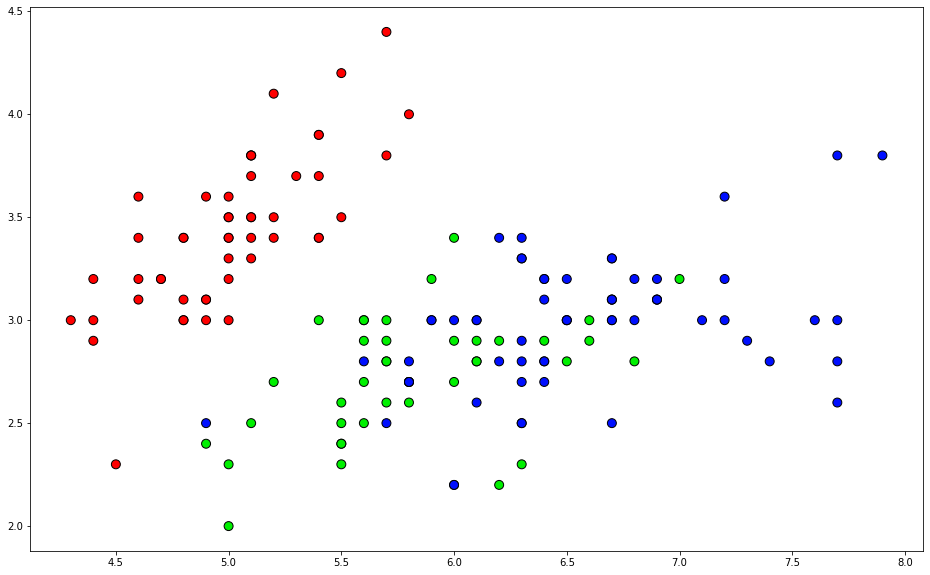

In [8]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000', '#00F000', '#000FFF'])



plt.figure(figsize=(16,10))
plt.scatter(X[:, 0], X[:, 1], c=y,  cmap=cmap, edgecolor='k', s=80)
plt.show()


In [18]:

k = 5
clf = KNN(k=k, distanceMethod=manhattan)
clf.fit(X, y)
predictions = clf.predict(X)
print("custom KNN classification accuracy", accuracy(y, predictions))

custom KNN classification accuracy 0.9666666666666667


#        Pros & Cons

  1.   Non-parametric
  2.    Non-Linear Performance
  3.   Versatility


  1.   K-NN slow algorithm
  2.   Curse of Dimensionality
  3.   Optimal number of neighbors:
  4.   Imbalanced data causes problems
  5.   Outlier sensitivity:
  6.  Missing Value treatment

